### Student Information
Name: 張之綺

Student ID: 112033635

GitHub ID: chihchi0717

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## ** >>> 1. First: The take home exercises **

In [71]:
### ** >>> Exercise 1 (5 min): **  
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

for t in twenty_train.data[:3]:
    print(t)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gur

### >>> Exercise 2 (take home):

In [72]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
#The method to query the 'alt.atheism' category in last 10 records
X_reverse = X[::-1][:10]
X_reverse
X_reverse.loc[lambda X: X['category_name'] == 'alt.atheism']

,text,category,category_name
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism


In [73]:
### ** >>> Exercise 3 (5 min): **  
X[X['category_name'] == 'sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


In [74]:
### >>> **Exercise 4 (5 min):** 
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> Exercise 5 (take home):

In [75]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
#When using the isnull() method to check whether the value of a DataFrame is null (NaN), the empty string ('') is not considered null. 
#This is because NaN (Not a Number) is typically used to represent missing values, whereas the empty string ('') is treated as a valid string value. 
#If we want to treat the empty string as a missing value, we need to process the data additionally and convert the empty string to NaN.
NA_df['missing_example'] = NA_df['missing_example'].replace('', np.nan)
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5     True
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
#The change from the 'X' dataframe to the X_sample involves adding columns : 'unigrams', 'bin_category'.

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

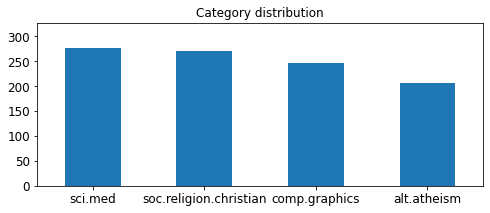

In [76]:
### >>> Exercise 7 (5 min):**
X_sample = X.sample(n=1000,random_state=42) #random state
#It is possible to automate the ylim parameter instead of hard-coding it.
#We can achieve this by dynamically determining the maximum value of the y-axis based on the data itself. 
#In this case, we can use the max() function to find the maximum value in the X_sample.category_name.value_counts() series. 

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
#Find the maximum value in the category distribution
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 (take home):

599
277
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


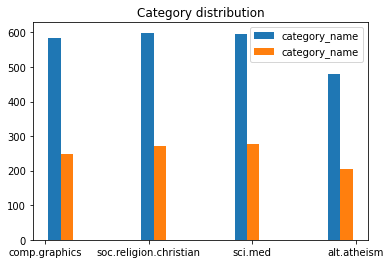

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
print(max(X.category_name.value_counts()))
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

plt.hist([X.category_name, X_sample.category_name],label=['category_name','category_name'])
plt.title('Category distribution')
plt.legend(loc='upper right')
plt.show()

In [78]:
### >>> Exercise 9 (5 min):**
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
#print(X.count)
#Count the frequency of each word.
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### >>> Exercise 10 (take home):

In [79]:
# Answer here
X_counts[0:5, 0:100].toarray()
for i in range(6):
    for j in range(101):
        if (X_counts[i:i+1, j:j+1].toarray() >= 1):          
            print('document :', i,',  index: ', j, ', vacabulary : ',count_vect.get_feature_names_out()[j])

document : 4 ,  index:  0 , vacabulary :  00
document : 4 ,  index:  37 , vacabulary :  01
document : 5 ,  index:  0 , vacabulary :  00


### >>> Exercise 11 (take home):

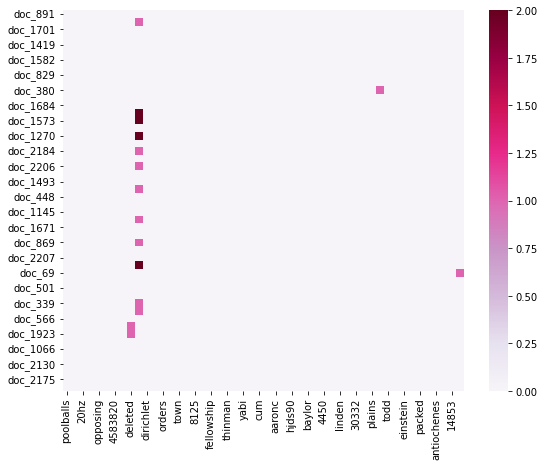

In [80]:
import numpy as np
import seaborn as sns
# Randomly select a subset of terms and documents
sample_size = 50  
selected_terms = np.random.choice(count_vect.get_feature_names_out(), sample_size, replace=False)
selected_docs = np.random.choice(list(X.index), sample_size, replace=False)
selected_terms_list = list(selected_terms)  # Convert the selected terms to a list

# Use the list of selected terms as an index
selected_matrix = X_counts[X.index.isin(selected_docs)][:, [count_vect.vocabulary_[term] for term in selected_terms_list]]

# Create a DataFrame for the selected data
df_selected = pd.DataFrame(selected_matrix.toarray(), columns=selected_terms_list, index=["doc_" + str(i) for i in selected_docs])

# Plot the selected matrix
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_selected, cmap="PuRd", annot=False)

### >>> Exercise 12 (take home):

                                                text  category  category_name
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
X_reduced3d shape :  (2257, 3)
X_reduced3d :  [[-17.01172954   0.45016638  -1.31226077]
 [ -6.80574586  -1.15880601  -0.40488279]
 [ 15.79461065   3.62233101  12.70799049]
 ...
 [ 19.97508176  -2.85495805   1.04076604]
 [163.88523745  29.52467722  -8.7017879 ]
 [-16.58569528   0.61748552  -1.88007225]]
categories ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


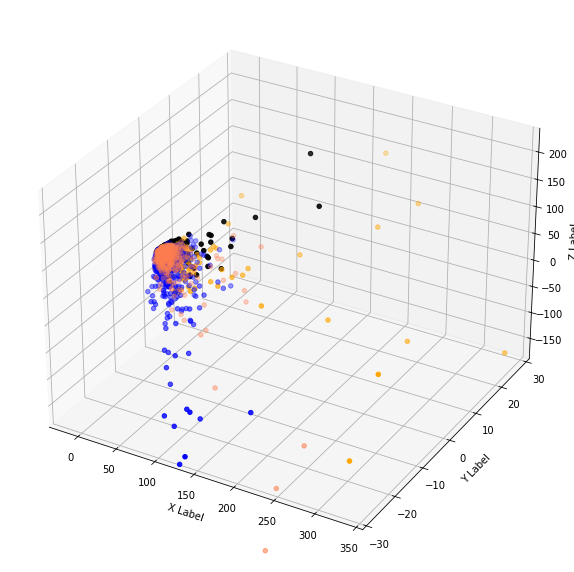

In [81]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import matplotlib.pyplot as plt
%matplotlib inline

# Reduce the dimension to 3
print(X[1:2])
X_reduced3d = PCA(n_components=3).fit_transform(X_counts.toarray())
print('X_reduced3d shape : ',X_reduced3d.shape)
print('X_reduced3d : ',X_reduced3d)
print('categories',categories)
# Define colors for categories
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3d[X['category_name'] == category].T[0]
    ys = X_reduced3d[X['category_name'] == category].T[1]
    zs = X_reduced3d[X['category_name'] == category].T[2]
    
    #ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.set_xlim(-30,350), ax.set_ylim(-30,30)
    ax.scatter(xs, ys,zs, c=c, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.savefig('graph.jpg')
plt.show()

### >>> Exercise 13 (take home):

In [82]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()[:300]

# Create a DataFrame for the data
data = {'Term': term_names, 'Frequency': term_frequencies[:300]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Term Frequencies',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
#fig.update_xaxes(categoryorder='total ascending')  # Sort the x-axis labels
fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
fig.show()

### >>> Exercise 14 (take home):

In [83]:
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

# Create a DataFrame for the terms
data = {'Term': term_names[:20], 'Frequency': term_frequencies[:20]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title=f'{20} Term Frequencies',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
fig.update_xaxes(title_text='Term Name', tickangle=45) 
fig.show()

### >>> Exercise 15 (take home): 

In [84]:
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

# Create a list of (term, frequency) tuples and sort by frequency in descending order
term_freq_pairs = sorted(zip(term_names, term_frequencies), key=lambda x: x[1], reverse=True)

# Extract the sorted terms and frequencies
sorted_terms = [term for term, frequency in term_freq_pairs]
sorted_frequencies = [frequency for term, frequency in term_freq_pairs]

n = 300

# Create a DataFrame for the top N terms
data = {'Term': sorted_terms[:n], 'Frequency': sorted_frequencies[:n]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title=f'{n} Term Frequencies',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
fig.show()

### >>> Exercise 16 (take home):

In [85]:
# LabelBinarizer can convert "category_name" from string categories into one-hot encoding.
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


## ** >>> 2. Second: The new dataset process **

In [86]:
import os
import os.path

filedir = '../sentiment+labelled+sentences/sentiment labelled sentences' 
filenames = ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']  #Get the name of each file in the folder
f = open('../sentiment+labelled+sentences/sentiment labelled sentences/combine_db.txt', 'w') # Open the file for writing, create it if it does not exist
#print(filenames)

for filename in filenames:
    filepath = filedir + '/' + filename  #Concate filedir and filename
    for line in open(filepath):  #Loop through the data in each file
        f.writelines(line)  #Write data line by line each time to the file opened by f

f.close() 

In [126]:
import pandas as pd
col = ['sentence', 'score']
sentiment_db = pd.read_csv('../sentiment+labelled+sentences/sentiment labelled sentences/combine_db.txt', sep='\\t',header=None, names=col, engine = "python")
print(sentiment_db)

                                               sentence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]


In [127]:
sentiment_db['score_name'] = sentiment_db.score
for i in range(sentiment_db.shape[0]):
    if sentiment_db['score_name'][i]==1:
        sentiment_db['score_name'][i]='positive'
    if sentiment_db['score_name'][i]==0:
        sentiment_db['score_name'][i]='negative'
sentiment_db

C:\Users\cchih\AppData\Local\Temp\ipykernel_20276\3567315337.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative


### >>>Experiment with other querying techniques using pandas dataframes.

In [128]:
#The method to query the 'alt.atheism' category in last 10 records
sentiment_db_reverse = sentiment_db[::-1][:100]
sentiment_db_reverse
sentiment_db_reverse.loc[lambda X: X['score'] == 1]

,sentence,score,score_name
2922,"Every time I eat here, I see caring teamwork t...",1,positive
2909,This is my new fav Vegas buffet spot.,1,positive
2907,The chips and sals a here is amazing!!!!!!!!!!...,1,positive
2901,Their regular toasted bread was equally satisf...,1,positive


### >>>Calculate the missing values in every record instead of every column.

In [129]:
import helpers.data_mining_helpers as dmh
sentiment_db.isnull().apply(lambda sentiment_db: dmh.check_missing_values(sentiment_db),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

<Axes: title={'center': 'Score distribution'}>

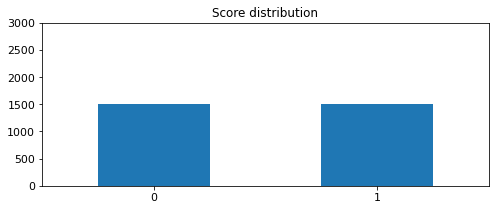

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
sentiment_db.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 3000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

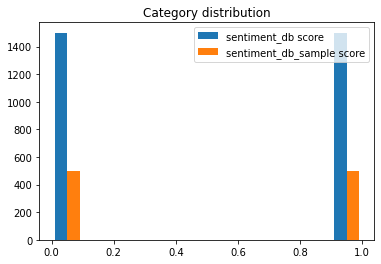

In [92]:
sentiment_db_sample = sentiment_db.sample(n=1000,random_state=42)
upper_bound = max(sentiment_db_sample.score.value_counts() + 50) #277 + 50

plt.hist([sentiment_db.score, sentiment_db_sample.score],label=['sentiment_db score','sentiment_db_sample score'])
plt.title('Category distribution')
plt.legend(loc='upper right')
plt.show()

### Feature subset selection

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
sentiment_db_counts = count_vect.fit_transform(sentiment_db.sentence)
analyze = count_vect.build_analyzer()
analyze(sentiment_db.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

### Verify 1 represents from the score

In [94]:
sentiment_db_counts[0:5, 0:100].toarray()
for i in range(6):
    for j in range(101):
        if (sentiment_db_counts[i:i+1, j:j+1].toarray() == 1):          
            print('document :', i,',  index: ', j, ', score : ',count_vect.get_feature_names_out()[j])

document : 3 ,  index:  45 , score :  45


### Seaborn

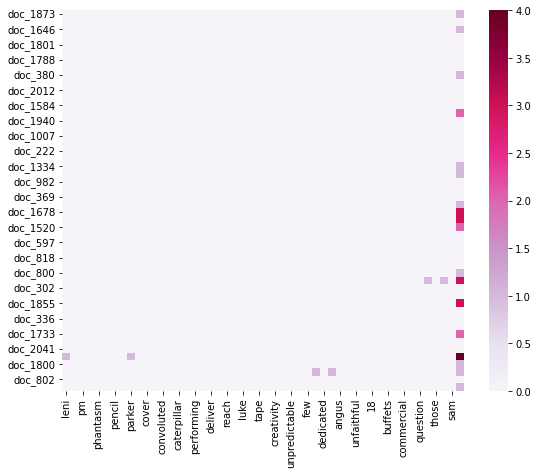

In [95]:
### **>>> Exercise 11 (take home):** 
import numpy as np
import seaborn as sns
# Randomly select a subset of terms and documents
sample_size = 50  
selected_terms = np.random.choice(count_vect.get_feature_names_out(), sample_size, replace=False)
selected_docs = np.random.choice(list(X.index), sample_size, replace=False)
selected_terms_list = list(selected_terms)  # Convert the selected terms to a list

# Use the list of selected terms as an index
selected_matrix = sentiment_db_counts[X.index.isin(selected_docs)][:, [count_vect.vocabulary_[term] for term in selected_terms_list]]

# Create a DataFrame for the selected data
df_selected = pd.DataFrame(selected_matrix.toarray(), columns=selected_terms_list, index=["doc_" + str(i) for i in selected_docs])

# Plot the selected matrix
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_selected, cmap="PuRd", annot=False)

### Dimensionality Reduction

                                                text  category  category_name  \
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics   

  bin_category_name  
1      [0, 1, 0, 0]  
X_reduced3d shape :  (3000, 2)
X_reduced3d :  [[ 0.53117626  0.29542083]
 [-0.89432426 -0.35844566]
 [ 0.01667017 -0.66797372]
 ...
 [-0.49766645  0.41058901]
 [ 0.50420859  0.36557418]
 [ 2.33657523 -0.47385259]]


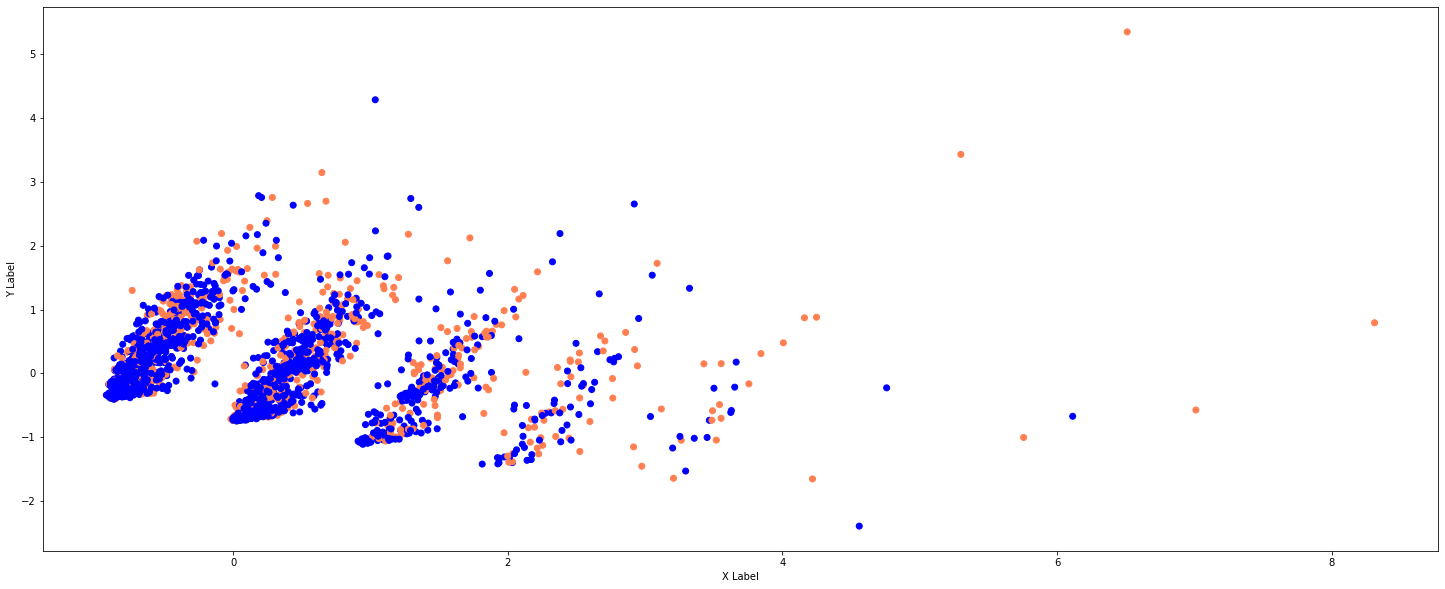

In [96]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import matplotlib.pyplot as plt
%matplotlib inline

# Reduce the dimension to 3
print(X[1:2])
sentiment_db_reduced3d = PCA(n_components=2).fit_transform(sentiment_db_counts.toarray())
print('X_reduced3d shape : ',sentiment_db_reduced3d.shape)
print('X_reduced3d : ',sentiment_db_reduced3d)
#print('score',score)
# Define colors for categories
col = ['coral', 'blue']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

colors = ['coral' if score == 'positive' else 'blue' for score in sentiment_db['score_name']]

ax.scatter(sentiment_db_reduced3d[:, 0], sentiment_db_reduced3d[:, 1], c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.savefig('graph.jpg')
plt.show()

                      sentence  score score_name
1  Good case, Excellent value.      1   positive
X_reduced3d shape :  (3000, 3)
X_reduced3d :  [[ 0.53117628  0.29541867 -1.34320712]
 [-0.89432431 -0.35842107  0.22654534]
 [ 0.01667021 -0.66800509  0.09276075]
 ...
 [-0.49766652  0.41072548  0.72183958]
 [ 0.5042086   0.3655773   0.39017066]
 [ 2.33657525 -0.47389925 -1.12060824]]


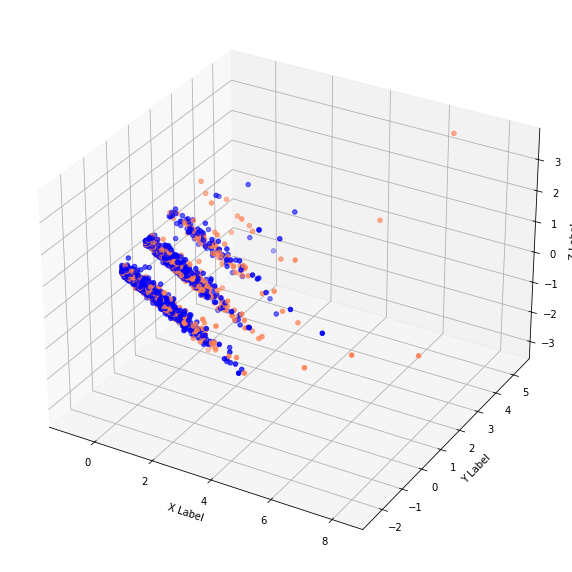

In [97]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import matplotlib.pyplot as plt
%matplotlib inline

# Reduce the dimension to 3
print(sentiment_db[1:2])
sentiment_db_reduced3d = PCA(n_components=3).fit_transform(sentiment_db_counts.toarray())
print('X_reduced3d shape : ',sentiment_db_reduced3d.shape)
print('X_reduced3d : ',sentiment_db_reduced3d)
#print('score',score)
# Define colors for categories
col = ['coral', 'blue']
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111, projection='3d')

colors = ['coral' if score == 'positive' else 'blue' for score in sentiment_db['score_name']]

ax.scatter(sentiment_db_reduced3d[:, 0], sentiment_db_reduced3d[:, 1], sentiment_db_reduced3d[:, 2], c=colors, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.savefig('graph.jpg')
plt.show()

### Use plotly

In [98]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate term frequencies
term_frequencies = np.asarray(sentiment_db_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()[:300]

# Create a DataFrame for the data
data = {'Term': term_names, 'Frequency': term_frequencies[:300]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Term Frequencies',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
#fig.update_xaxes(categoryorder='total ascending')  # Sort the x-axis labels
fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels

# Show the plot
fig.show()

In [99]:
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(sentiment_db_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

# Create a DataFrame for the terms
data = {'Term': term_names[:20], 'Frequency': term_frequencies[:20]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title=f'{20} Term Frequencies',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
fig.update_xaxes(title_text='Term Name', tickangle=45) 
fig.show()

In [100]:
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(sentiment_db_counts.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

# Create a list of (term, frequency) tuples and sort by frequency in descending order
term_freq_pairs = sorted(zip(term_names, term_frequencies), key=lambda x: x[1], reverse=True)

# Extract the sorted terms and frequencies
sorted_terms = [term for term, frequency in term_freq_pairs]
sorted_frequencies = [frequency for term, frequency in term_freq_pairs]

n = 300

# Create a DataFrame for the top N terms
data = {'Term': sorted_terms[:n], 'Frequency': sorted_frequencies[:n]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title=f'{n} Term Frequencies',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
fig.show()

## ** >>> 3. Third: The new dataset tasks **

### 3.1 New data visualizations

In [101]:
sentiment_db

,sentence,score,score_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,0
2996,Appetite instantly gone.,0,0
2997,Overall I was not impressed and would not go b...,0,0
2998,"The whole experience was underwhelming, and I ...",0,0


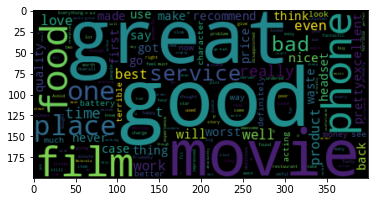

In [102]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
#print(type(sentiment_db.sentence))

wordcloud = WordCloud().generate(sentiment_db.sentence.to_string())

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### 3.2 TF-IDF features

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidvectorizer = TfidfVectorizer()
tfidf_df = tfidvectorizer.fit_transform(sentiment_db.sentence)
print(tfidf_df[0])

  (0, 1013)	0.3982952688733835
  (0, 647)	0.22339534467811012
  (0, 1982)	0.23151202391135026
  (0, 4793)	0.33187908783248754
  (0, 4835)	0.27541073174789316
  (0, 4531)	0.08671624087955355
  (0, 2158)	0.22277715355242936
  (0, 2314)	0.2956111707754561
  (0, 2432)	0.11981679118086065
  (0, 3387)	0.30861882226834114
  (0, 4609)	0.1274893309301928
  (0, 2809)	0.22865092628677175
  (0, 1829)	0.15620766310867332
  (0, 4987)	0.24912940464591313
  (0, 3043)	0.22339534467811012
  (0, 2427)	0.12068394874592439
  (0, 4545)	0.20763211346881053
  (0, 4161)	0.18746612963796125


### 3.3 Naive Bayes classifier

In [104]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

x = tfidf_df
y = sentiment_db.score
print(x)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
bnb = BernoulliNB()
y_pred = bnb.fit(x_train, y_train).predict(x_test)
print("Bernoulli Naive Bayes classifier accuracy: ", bnb.score(x_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred).sum()))

  (0, 1013)	0.3982952688733835
  (0, 647)	0.22339534467811012
  (0, 1982)	0.23151202391135026
  (0, 4793)	0.33187908783248754
  (0, 4835)	0.27541073174789316
  (0, 4531)	0.08671624087955355
  (0, 2158)	0.22277715355242936
  (0, 2314)	0.2956111707754561
  (0, 2432)	0.11981679118086065
  (0, 3387)	0.30861882226834114
  (0, 4609)	0.1274893309301928
  (0, 2809)	0.22865092628677175
  (0, 1829)	0.15620766310867332
  (0, 4987)	0.24912940464591313
  (0, 3043)	0.22339534467811012
  (0, 2427)	0.12068394874592439
  (0, 4545)	0.20763211346881053
  (0, 4161)	0.18746612963796125
  (1, 4861)	0.6340416987777308
  (1, 1603)	0.47072204948062
  (1, 713)	0.513063291919973
  (1, 1993)	0.3364192842689825
  (2, 2449)	0.8233779731740677
  (2, 2023)	0.3996123298170515
  (2, 4531)	0.1955703921972776
  :	:
  (2999, 1387)	0.2933113788886697
  (2999, 5110)	0.2933113788886697
  (2999, 3437)	0.2933113788886697
  (2999, 3857)	0.2688563788371658
  (2999, 2068)	0.27900612090340604
  (2999, 588)	0.2444013787856619
  (29

In [105]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

x = sentiment_db_counts.toarray()
y = sentiment_db.score
print(x)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
bnb = BernoulliNB()
y_pred = bnb.fit(x_train, y_train).predict(x_test)
print("Bernoulli Naive Bayes classifier accuracy: ", bnb.score(x_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred).sum()))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Bernoulli Naive Bayes classifier accuracy:  0.8316666666666667
Number of mislabeled points out of a total 600 points : 101


In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x = tfidf_df.toarray()
y = sentiment_db.score

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("GaussianNB Naive Bayes classifier accuracy: ", gnb.score(x_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred).sum()))

Bernoulli Naive Bayes classifier accuracy:  0.6466666666666666
Number of mislabeled points out of a total 600 points : 212


In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x = sentiment_db_counts.toarray()
y = sentiment_db.score

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("GaussianNB Naive Bayes classifier accuracy: ", gnb.score(x_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred).sum()))

Bernoulli Naive Bayes classifier accuracy:  0.6433333333333333
Number of mislabeled points out of a total 600 points : 214


In [116]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

x = tfidf_df.toarray()
y = sentiment_db.score

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
mnb = MultinomialNB()
y_pred = mnb.fit(x_train, y_train).predict(x_test)
print("Multinomial Naive Bayes classifier accuracy: ", mnb.score(x_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred).sum()))

MultinomialNB Naive Bayes classifier accuracy:  0.83
Number of mislabeled points out of a total 600 points : 102


In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

x = sentiment_db_counts.toarray()
y = sentiment_db.score

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)
mnb = MultinomialNB()
y_pred = mnb.fit(x_train, y_train).predict(x_test)
print("Multinomial Naive Bayes classifier accuracy: ", mnb.score(x_test, y_test))
print("Number of mislabeled points out of a total %d points : %d"% (x_test.shape[0], (y_test != y_pred).sum()))

Multinomial Naive Bayes classifier accuracy:  0.8283333333333334
Number of mislabeled points out of a total 600 points : 103


### The differences between TF-IDF and Count Vectorization

When using BernoulliNB, the results of TF-IDF are equivalent to the results of Count Vectorization. 
However, in GaussianNB and MultinomialNB, using TF-IDF results in higher accuracy than Count Vectorization.

Feature Representation:

TF-IDF (Term Frequency-Inverse Document Frequency) considers word frequency in the document and corpus, emphasizing words frequent in specific documents but rare in the corpus.
Count Vectorization (Bag of Words Model) simply counts word occurrences in each document and doesn't consider overall word frequency.

Applicability:

TF-IDF is more effective in tasks like text classification and clustering as it aids in identifying key words.
Count Vectorization is suitable for simpler text processing tasks but may not capture word importance.

## ** >>>4. Fourth: inefficent parts **

### 4.1 Changing the above method into map numeric scores to labels

In [110]:
#　The inefficent parts :
# sentiment_db['score_name'] = sentiment_db.score
# for i in range(X.shape[0]):
#     if sentiment_db['score_name'][i]==1:
#         sentiment_db['score_name'][i]='positive'
#     else :
#         sentiment_db['score_name'][i]='negative'


sentiment_db['score_name'] = sentiment_db['score'].map({1: 'positive', 0: 'negative'})

### 4.2 Visualize data after removing stopword

In [111]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# print(stop_words)

tfid_stop_words = CountVectorizer(stop_words=stop_words)
nltk_without_stopword = tfid_stop_words.fit_transform(sentiment_db.sentence)


### Term Frequencies without nltk stopwords

In [119]:
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(nltk_without_stopword.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

# Create a list of (term, frequency) tuples and sort by frequency in descending order
term_freq_pairs = sorted(zip(term_names, term_frequencies), key=lambda x: x[1], reverse=True)

# Extract the sorted terms and frequencies
sorted_terms = [term for term, frequency in term_freq_pairs]
sorted_frequencies = [frequency for term, frequency in term_freq_pairs]

n = 300

# Create a DataFrame for the top N terms
data = {'Term': sorted_terms[:n], 'Frequency': sorted_frequencies[:n]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title=f'{n} Term Frequencies without stopwords',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
fig.show()

### Term Frequencies without sklearn stopwords

In [114]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

tfid_stop_words = CountVectorizer(stop_words=sklearn_stop_words)
sklearn_without_stopword = tfid_stop_words.fit_transform(sentiment_db.sentence)


In [118]:
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(sklearn_without_stopword.sum(axis=0))[0]
term_names = count_vect.get_feature_names_out()

# Create a list of (term, frequency) tuples and sort by frequency in descending order
term_freq_pairs = sorted(zip(term_names, term_frequencies), key=lambda x: x[1], reverse=True)

# Extract the sorted terms and frequencies
sorted_terms = [term for term, frequency in term_freq_pairs]
sorted_frequencies = [frequency for term, frequency in term_freq_pairs]

n = 300

# Create a DataFrame for the top N terms
data = {'Term': sorted_terms[:n], 'Frequency': sorted_frequencies[:n]}
df = pd.DataFrame(data)

# Create a bar plot using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title=f'{n} Term Frequencies without stopwords',
             labels={'Term': 'Term Name', 'Frequency': 'Frequency'})

# Customize the appearance of the plot
fig.update_xaxes(title_text='Term Name', tickangle=45)  # Rotate x-axis labels
fig.show()